In [2]:
# load packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams["figure.figsize"] = (12,8)

In [1]:
# !nvidia-smi

zsh:1: command not found: nvidia-smi


## Meta-data

In [3]:
# read in data

base_path = '~/Dropbox/Courses/CSCI_109B/final_project/'
df_meta = pd.read_csv(base_path + 'meta_data/Data_Entry_2017_v2020.csv')
print("Dataset dimensions:", df_meta.shape, "\n")
df_meta.head(3)

Dataset dimensions: (112120, 11) 



,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y]
0,00000001_000.png,Cardiomegaly,0,1,57,M,PA,2682,2749,0.143,0.143
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168


In [4]:
df_meta.dtypes

Image Index                     object
Finding Labels                  object
Follow-up #                      int64
Patient ID                       int64
Patient Age                      int64
Patient Gender                  object
View Position                   object
OriginalImage[Width              int64
Height]                          int64
OriginalImagePixelSpacing[x    float64
y]                             float64
dtype: object

In [6]:
df_meta.nunique()

Image Index                    112120
Finding Labels                    836
Follow-up #                       184
Patient ID                      30805
Patient Age                        96
Patient Gender                      2
View Position                       2
OriginalImage[Width               904
Height]                          1137
OriginalImagePixelSpacing[x        23
y]                                 23
dtype: int64

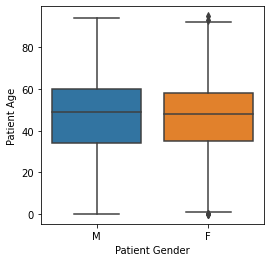

In [7]:
# patient age and gender

plt.figure(figsize=(4,4))
sns.boxplot(x="Patient Gender", y="Patient Age", data=df_meta);

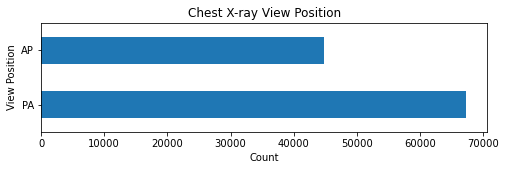

In [8]:
# barplot of view position

plt.figure(figsize=(8,2))
df_meta['View Position'].value_counts().plot(kind="barh", legend=False)
plt.title("Chest X-ray View Position")
plt.ylabel("View Position")
plt.xlabel("Count");

In [9]:
# counts of Finding Labels

df_meta_labels = df_meta['Finding Labels'].value_counts().rename_axis('Finding Labels').reset_index(name='Counts')
print(df_meta_labels.shape)
df_meta_labels.head()

(836, 2)


,Finding Labels,Counts
0,No Finding,60361
1,Infiltration,9547
2,Atelectasis,4215
3,Effusion,3955
4,Nodule,2705


In [11]:
# limit counts to >500

df_meta_labels_large = df_meta_labels[df_meta_labels['Counts'] > 500]
print(df_meta_labels_large.shape)
df_meta_labels_large

(18, 2)


,Finding Labels,Counts
0,No Finding,60361
1,Infiltration,9547
2,Atelectasis,4215
3,Effusion,3955
4,Nodule,2705
5,Pneumothorax,2194
6,Mass,2139
7,Effusion|Infiltration,1603
8,Atelectasis|Infiltration,1350
9,Consolidation,1310


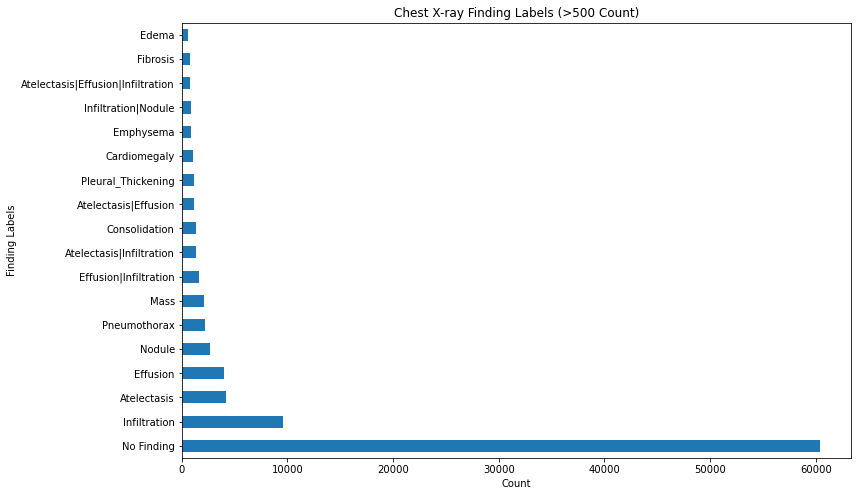

In [12]:
# bar plot

df_meta_labels_large.set_index('Finding Labels').plot(kind="barh", legend=False)
plt.title("Chest X-ray Finding Labels (>500 Count)")
plt.ylabel("Finding Labels")
plt.xlabel("Count");

## One-Hot Encoded Label Data

In [13]:
df_y_onehot = pd.read_csv(base_path + 'label_data/train_relabeled.csv')
print("Dataset dimensions:", df_y_onehot.shape, "\n")
df_y_onehot.head(3)

Dataset dimensions: (98637, 15) 



,Path,Cardiomegaly,Emphysema,Effusion,Hernia,Infiltration,Mass,Nodule,Atelectasis,Pneumothorax,Pleural-Thickening,Pneumonia,Fibrosis,Edema,Consolidation
0,images/00000001_000.png,1,0,0,1,0,0,0,0,0,0,0,0,0,0
1,images/00000001_001.png,1,1,0,1,0,0,0,0,0,0,0,0,0,0
2,images/00000001_002.png,1,0,1,1,0,0,0,0,0,0,0,1,0,0


In [14]:
diseases = ['Atelectasis', 'Cardiomegaly', 'Effusion', 'Infiltration',  'Mass', 'Nodule', 'Pneumonia', 'Pneumothorax']

In [16]:
diseases_onehot = df_y_onehot[diseases]
diseases_onehot.head()

,Atelectasis,Cardiomegaly,Effusion,Infiltration,Mass,Nodule,Pneumonia,Pneumothorax
0,0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0
2,0,1,1,0,0,0,0,0
3,0,0,0,0,0,1,0,0
4,0,0,0,0,1,1,0,0


## Disease Correlations

In [21]:
from sklearn.metrics import matthews_corrcoef

diseases_corr = diseases_onehot.corr(method=matthews_corrcoef)
diseases_corr

,Atelectasis,Cardiomegaly,Effusion,Infiltration,Mass,Nodule,Pneumonia,Pneumothorax
Atelectasis,1.000000,0.007130,0.298670,0.088704,0.007815,-0.070741,0.036840,0.061257
Cardiomegaly,0.007130,1.000000,0.092315,0.053113,-0.064970,-0.058080,0.064118,-0.083210
Effusion,0.298670,0.092315,1.000000,0.191233,0.144478,0.002318,0.134799,0.090660
Infiltration,0.088704,0.053113,0.191233,1.000000,0.016162,0.069063,0.524039,-0.019243
Mass,0.007815,-0.064970,0.144478,0.016162,1.000000,0.357218,0.007126,0.063410
Nodule,-0.070741,-0.058080,0.002318,0.069063,0.357218,1.000000,0.102962,-0.006028
Pneumonia,0.036840,0.064118,0.134799,0.524039,0.007126,0.102962,1.000000,-0.071113
Pneumothorax,0.061257,-0.083210,0.090660,-0.019243,0.063410,-0.006028,-0.071113,1.000000


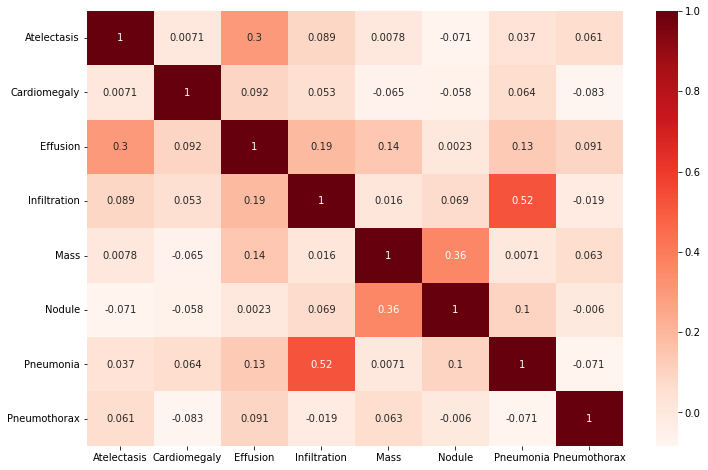

In [25]:
# heatmap
sns.heatmap(diseases_corr, cmap="Reds", annot=True);